1. [集成学习概念](#集成学习概念)
2. [个体学习器概念](#个体学习器概念)
3. [boosting](#Boosting)
4. [结合策略(平均法，投票法，学习法)](#结合策略(平均法，投票法，学习法))
5. [随机森林思想](#随机森林思想)
6. [随机森林的推广](#随机森林的推广)
7. [优缺点](#优缺点)
8. [sklearn参数](#sklearn参数)
9. [应用场景](#应用场景)

# 集成学习概念
集成学习通过投票或平均等策略,结合多个个体学习器的结果, 通常可获得比单一学习器更好的泛化效果.

# 个体学习器概念
个体学习器通常就是传统的机器学习算法,如决策树, 神经网络等.

根据个体学习器的生成方式,主要分类两大类:
- Boosting, 个体学习器之间存在强依赖关系, 必须串行生成的序列化方法
- Bagging, 个体学习器之间不存在强依赖关系, 可同时生成的并行化方法

# Boosting
Boosting是一簇可将弱学习器提升为强学习器的算法:

先从初始训练集训练出一个基学习器, 再根据其表现对样本的分布进行调整, 给学习器预测错误的样本在后续的训练中添加更打的权重, 然后基于调整过的分布再来进行新学习器的训练,如此反复到事先指定的次数, 最终加权结合.
## AdaBoost
AdaBoost是Boosting中著代表性的算法, 具体则为基学习器的线性组合$$H(X)=\mathop{\sum}_{t=1}^{T}\alpha_th_t(x)$$
据此来最小化指数损失$$\mathscr l_{exp}(H|D)=\mathbb E_{\mathscr x\in\mathcal D}\left[e^{-f(x)H(x)}\right]$$

>算法

输入: $训练数据集T={(x_1,y_1),(x_2,y_2),...,(x_N,y_N)}, x_i\in \mathcal X \subseteq R^n, y\in \mathcal Y=\{-1,+1\}; 弱学习算法$
输出: 集成学习器G(x)
- 1. 初始化训练数据权值分布$$D_1=(w_{11},...,w_{1i},...,w_{1N}), \space\space w_{1i}=\frac{1}{N}, \space\space i=1,2,...N$$
- 2. 对m=1,2,...,M
   - a. 对具有权值分布$D_m$的训练数据学习, 得到基学习器$$G_m(x):\mathcal X \rightarrow \{-1,+1\}$$
   - b. 计算$G_m(x)$在训练集上的分类误差率,$$e_m=\sum_{i=1}^{N}P(G_m(x_i)\neq y_i)=\sum_{i=1}^{N}w_{mi}I(G_m(x_i)\neq y_i)$$
   - c. 计算G_m(x)的系数$$\alpha_m=\frac{1}{2}log\frac{1-e_m}{e_m}$$
   - d. 更新训练数据的权值分布$$D_{m+1}=(w_{m+1,1},...,w_{m+1,i},...,w_{m+1, N}) \\ w_{m+1,i}=\frac{w_{mi}}{Z_m}exp(-\alpha_m y_iG_m(x_i)), \space\space i=1,2,...,N \\ 其中Z_m为规范化因子:\space\space\space\space Z_m=\sum_{i=1}^{N}w_{mi}exp(-\alpha_m y_iG_m(x))$$使D成为一个新的概率分布
- 3. 构建基分类器的线性组合$$G(x)=sign(f(x))=sign\left(\sum_{m=1}^{M}\alpha_mG_m(x)\right)$$

AdaBoost算法是前向逐步分布加法算法的特例,这时, 模型是由基本分类器组成的加法模型, 损失函数为指数损失.

# 结合策略(平均法，投票法，学习法)
## 平均
- 简单平均 $$H(x)=\frac{1}{T}\sum_{i=1}^{T}h_i(x)$$
- 加权平均 $$H(x)=\sum_{i=1}^{T}w_ih_i(x), 其中w_i\geq0, \sum_{i=1}^{T}=1$$

## 投票
- 绝对多数投票 $$H(x)=\left\{\begin{aligned} c_j &  & if \sum_{i=1}^{T}h_i^j(x)>0.5\sum_{k=1}^{N}\sum_{i=1}^{T}h_i^k(x); \\ reject, &&   otherwise. \end{aligned}\right.$$
- 相对多数投票$$H(x)=c_{\mathop{\arg\max}_j\sum_{i=1}^{T}h_i^j(x)}$$
- 加权投票$$H(x)=c_{\mathop{\arg\max}_j\sum_{i=1}^{T}w_ih_i^j(x)}$$

## 学习法
当训练集数据很多时, 学习法会是更为强大的组合策略,即通过另一个学习器来结合.

学习法的典型代表是Stacking, 用于结合的学习器称为次级学习器或元学习器, Stacking先从初始数据集中训练出初级学习器, 然后生成一个新数据集来训练次级学习器.通常初级集成是异质的, 即使用不同的传统算法

# 随机森林思想
随机森林是Bagging的一个扩展变体, 它在以决策树为基学习器构建Bagging的基础之上, 进一步在训练过程中引入了随机属性选择.从随机的k个特征中选出最优划分特征

与Bagging中基学习器的多样性(通过样本扰动)不同, 随机森林中的多样性不仅来自样本扰动,还包括属性绕动.

# 随机森林的推广
>Extra trees

- 1. extra trees不使用Boostrap采样, 

- 2. extra引入的随机更强, 从所有特征中随机选一个进行划分

>Totally Random Trees Embedding

TRTE是一种非监督学习的数据转化方法。类似SVM的核方法, 将低维的数据集映射到高维，让映射到高维的数据更好的运用于分类回归模型。

TRTE在数据转化的过程也使用了类似于RF的方法，建立T个决策树来拟合数据。当决策树建立完毕以后，数据集里的每个数据在T个决策树中叶子节点的位置也定下来了。比如我们有3颗决策树，每个决策树有5个叶子节点，某个数据特征x划分到第一个决策树的第2个叶子节点，第二个决策树的第3个叶子节点，第三个决策树的第5个叶子节点。则x映射后的特征编码为(0,1,0,0,0,     0,0,1,0,0,     0,0,0,0,1), 有15维的高维特征。这里特征维度之间加上空格是为了强调三颗决策树各自的子编码。
>Isolation Forest

Isolation Forest是一种异常点检测的方法。

对于在T个决策树的样本集，Isolation Forest也会对训练集进行随机采样,但是采样个数不需要和RF一样，对于RF，需要采样到采样集样本个数等于训练集个数。Isolation Forest不需要采样这么多.

对于每一个决策树的建立，Isolation Forest采用随机选择一个划分特征，对划分特征随机选择一个划分阈值。

Isolation Forest一般会选择一个比较小的max_depth。

对于异常点的判断，则是将测试样本点x拟合到T颗决策树。计算在每颗决策树上该样本的叶子节$点的深度h_t(x)$。，从而可以计算出平均高度h(x)。计算样本点x的异常概率: $$s(x,m)=2^{-\frac{h(x)}{c(m)}}$$

其中，m为样本个数。c(m)的表达式为：$$c(m)=2ln(m−1)+\xi−2\frac{m−1}{m}, \space \xi为欧拉常数$$

s(x,m)的取值范围是[0,1],取值越接近于1，则是异常点的概率也越大。

# 优缺点
>优点：

- 1. 能够输出特征的重要度
- 2. 可以应对缺失数据；
- 3. 当存在分类不平衡的情况时，随机森林能够提供平衡数据集误差的有效方法；
- 4. 高度并行化，易于分布式实现
- 5. 数据不需要归一化

>缺点：

- 1. 在回归时，随机森林不能够作出超越训练集数据范围的预测，容易过度拟合。
- 2. 忽略属性之间的相关性


# sklearn参数
|参数|用途
|:-:|:-:|
|n_estimators|随机森林中树的棵树，默认是10棵。
|criterion|样本集切分策略，默认是gini指数，此时树模型为CART模型，当值选为信息增益的时候，模型就成了ID3模型，默认为CART模型。
|bootstrap|是统计学中的一种重采样技术，可以简单理解成是有放回地抽样，默认是True,即采取有放回抽样这种策略，这不就是bagging的思想么。
|oob_score袋外估计(out-of-bag)|这个外是针对于bagging这个袋子而言的，我们知道，bagging采取的随机抽样的方式去建立树模型，那么那些未被抽取到的样本集，也就是未参与建立树模型的数据集就是袋外数据集，我们就可以用这部分数据集去验证模型效果，默认值为False。
|classes_|输出样本集的类别。
|n_classes_|输出类别数量。
|n_features_|特征数量。
|n_outputs_|当模型被fit时的输出维度。看看下图来感受一些这个属性。
|feature_importances_|特征重要性。
|oob_score_|袋外估计准确率得分，必须是oob_score参数选择True的时候才可用。
|oob_decision_function_|袋外估计对应的决策函数。

# 应用场景

- 1. 不要求线性特征, 比如LR很难处理类别特征，而Tree Ensembles，是一些决策树的集合，可以很容易得处理这些情况
- 2. 由于算法构建的过程(bagging or boosting)，这些算法很容易处理高维的数据，大量的训练数据的场景

In [4]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(20190404)

In [7]:
data = datasets.make_classification(n_samples=1000, n_classes=4, 
                                    n_features=2, n_redundant=0, n_clusters_per_class=1)

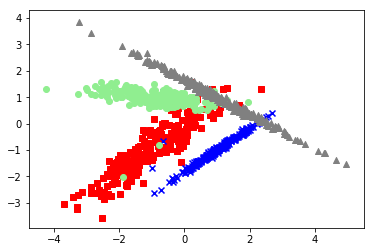

In [8]:
plt.scatter(data[0][data[1]==0,0], data[0][data[1]==0,1], c='r', marker='s')
plt.scatter(data[0][data[1]==1,0], data[0][data[1]==1,1], c='b', marker='x')
plt.scatter(data[0][data[1]==2,0], data[0][data[1]==2,1], c='lightgreen', marker='o')
plt.scatter(data[0][data[1]==3,0], data[0][data[1]==3,1], c='gray', marker='^');

In [9]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(data[0],data[1])

/home/wcw/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

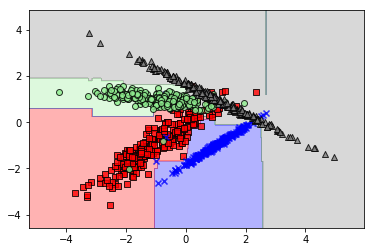

In [10]:
from matplotlib.colors import ListedColormap
# https://github.com/rasbt/python-machine-learning-book-2nd-edition/tree/master/code/ch03
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

plot_decision_regions(X=data[0], y=data[1],
                      classifier=rfc, test_idx=range(105, 150))

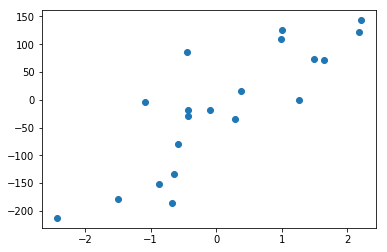

In [11]:
data = datasets.make_regression(n_samples=20, n_features=1, bias=0.5, noise=50,random_state=123,)
plt.scatter(data[0],data[1]);

In [20]:
rfr = RandomForestRegressor(max_depth=2)
rfr.fit(data[0],data[1])

/home/wcw/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

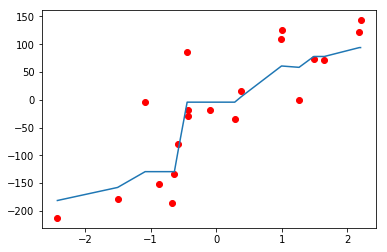

In [21]:
y = rfr.predict(data[0])
plt.scatter(data[0],data[1], c='r')
idx = np.argsort(data[0], axis=0)
plt.plot(data[0][idx].flatten(), y[idx]);